In [62]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [63]:
# from https://github.com/pvigier/perlin-numpy/tree/master

def interpolant(t):
    return t*t*t*(t*(t*6 - 15) + 10)

def generate_perlin_noise_2d(
        shape, res, tileable=(False, False), interpolant=interpolant
):
    """Generate a 2D numpy array of perlin noise.

    Args:
        shape: The shape of the generated array (tuple of two ints).
            This must be a multple of res.
        res: The number of periods of noise to generate along each
            axis (tuple of two ints). Note shape must be a multiple of
            res.
        tileable: If the noise should be tileable along each axis
            (tuple of two bools). Defaults to (False, False).
        interpolant: The interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of shape shape with the generated noise.

    Raises:
        ValueError: If shape is not a multiple of res.
    """
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0], 0:res[1]:delta[1]]\
             .transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    if tileable[0]:
        gradients[-1,:] = gradients[0,:]
    if tileable[1]:
        gradients[:,-1] = gradients[:,0]
    gradients = gradients.repeat(d[0], 0).repeat(d[1], 1)
    g00 = gradients[    :-d[0],    :-d[1]]
    g10 = gradients[d[0]:     ,    :-d[1]]
    g01 = gradients[    :-d[0],d[1]:     ]
    g11 = gradients[d[0]:     ,d[1]:     ]
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = interpolant(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

def generate_perlin_noise_3d(
        shape, res, tileable=(False, False, False),
        interpolant=interpolant
):
    """Generate a 3D numpy array of perlin noise.

    Args:
        shape: The shape of the generated array (tuple of three ints).
            This must be a multiple of res.
        res: The number of periods of noise to generate along each
            axis (tuple of three ints). Note shape must be a multiple
            of res.
        tileable: If the noise should be tileable along each axis
            (tuple of three bools). Defaults to (False, False, False).
        interpolant: The interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of shape shape with the generated noise.

    Raises:
        ValueError: If shape is not a multiple of res.
    """
    delta = (res[0] / shape[0], res[1] / shape[1], res[2] / shape[2])
    d = (shape[0] // res[0], shape[1] // res[1], shape[2] // res[2])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1],0:res[2]:delta[2]]
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1],0:res[2]:delta[2]]
    grid = grid.transpose(1, 2, 3, 0) % 1
    # Gradients
    theta = 2*np.pi*np.random.rand(res[0] + 1, res[1] + 1, res[2] + 1)
    phi = 2*np.pi*np.random.rand(res[0] + 1, res[1] + 1, res[2] + 1)
    gradients = np.stack(
        (np.sin(phi)*np.cos(theta), np.sin(phi)*np.sin(theta), np.cos(phi)),
        axis=3
    )
    if tileable[0]:
        gradients[-1,:,:] = gradients[0,:,:]
    if tileable[1]:
        gradients[:,-1,:] = gradients[:,0,:]
    if tileable[2]:
        gradients[:,:,-1] = gradients[:,:,0]
    gradients = gradients.repeat(d[0], 0).repeat(d[1], 1).repeat(d[2], 2)
    g000 = gradients[    :-d[0],    :-d[1],    :-d[2]]
    g100 = gradients[d[0]:     ,    :-d[1],    :-d[2]]
    g010 = gradients[    :-d[0],d[1]:     ,    :-d[2]]
    g110 = gradients[d[0]:     ,d[1]:     ,    :-d[2]]
    g001 = gradients[    :-d[0],    :-d[1],d[2]:     ]
    g101 = gradients[d[0]:     ,    :-d[1],d[2]:     ]
    g011 = gradients[    :-d[0],d[1]:     ,d[2]:     ]
    g111 = gradients[d[0]:     ,d[1]:     ,d[2]:     ]
    # Ramps
    n000 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]  , grid[:,:,:,2]  ), axis=3) * g000, 3)
    n100 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]  , grid[:,:,:,2]  ), axis=3) * g100, 3)
    n010 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]-1, grid[:,:,:,2]  ), axis=3) * g010, 3)
    n110 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]-1, grid[:,:,:,2]  ), axis=3) * g110, 3)
    n001 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]  , grid[:,:,:,2]-1), axis=3) * g001, 3)
    n101 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]  , grid[:,:,:,2]-1), axis=3) * g101, 3)
    n011 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]-1, grid[:,:,:,2]-1), axis=3) * g011, 3)
    n111 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]-1, grid[:,:,:,2]-1), axis=3) * g111, 3)
    # Interpolation
    t = interpolant(grid)
    n00 = n000*(1-t[:,:,:,0]) + t[:,:,:,0]*n100
    n10 = n010*(1-t[:,:,:,0]) + t[:,:,:,0]*n110
    n01 = n001*(1-t[:,:,:,0]) + t[:,:,:,0]*n101
    n11 = n011*(1-t[:,:,:,0]) + t[:,:,:,0]*n111
    n0 = (1-t[:,:,:,1])*n00 + t[:,:,:,1]*n10
    n1 = (1-t[:,:,:,1])*n01 + t[:,:,:,1]*n11
    return ((1-t[:,:,:,2])*n0 + t[:,:,:,2]*n1)

def generate_fractal_noise_2d(
        shape, res, octaves=1, persistence=0.5,
        lacunarity=2, tileable=(False, False),
        interpolant=interpolant
):
    """Generate a 2D numpy array of fractal noise.

    Args:
        shape: The shape of the generated array (tuple of two ints).
            This must be a multiple of lacunarity**(octaves-1)*res.
        res: The number of periods of noise to generate along each
            axis (tuple of two ints). Note shape must be a multiple of
            (lacunarity**(octaves-1)*res).
        octaves: The number of octaves in the noise. Defaults to 1.
        persistence: The scaling factor between two octaves.
        lacunarity: The frequency factor between two octaves.
        tileable: If the noise should be tileable along each axis
            (tuple of two bools). Defaults to (False, False).
        interpolant: The, interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of fractal noise and of shape shape generated by
        combining several octaves of perlin noise.

    Raises:
        ValueError: If shape is not a multiple of
            (lacunarity**(octaves-1)*res).
    """
    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * generate_perlin_noise_2d(
            shape, (frequency*res[0], frequency*res[1]), tileable, interpolant
        )
        frequency *= lacunarity
        amplitude *= persistence
    return noise


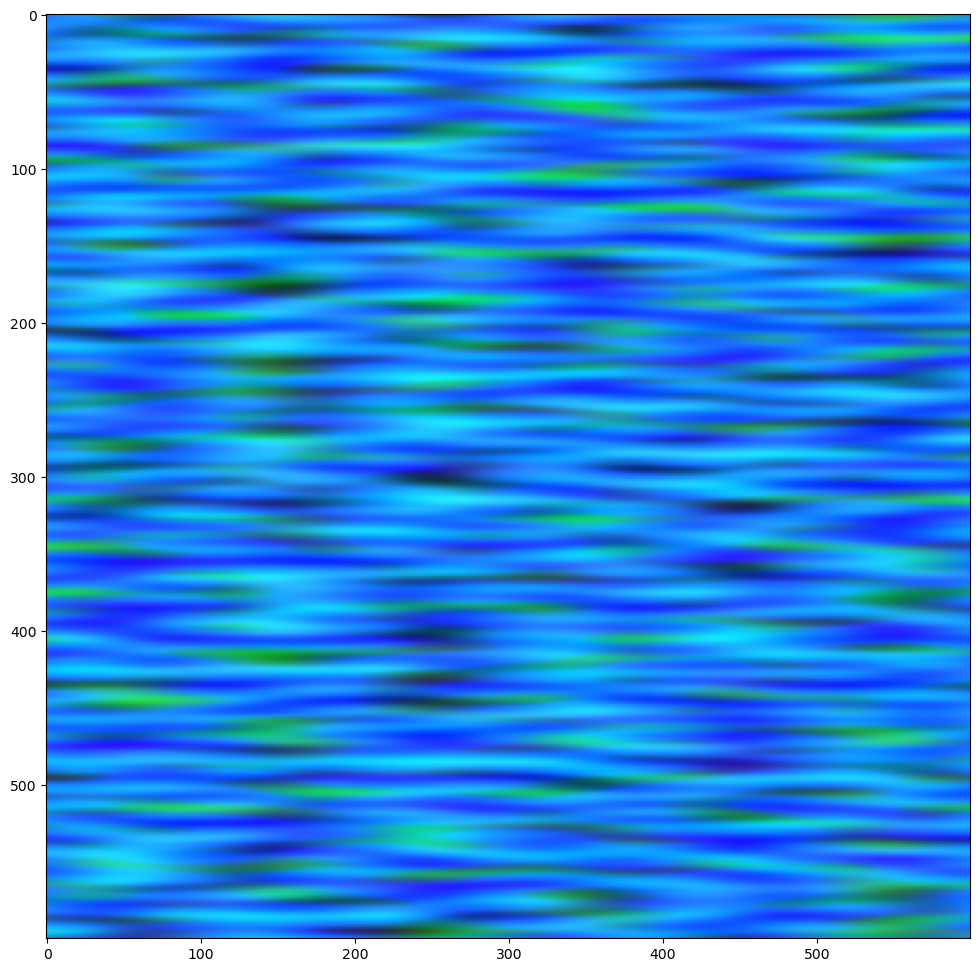

In [96]:
noiseShape = 600
xGridpoints = 60
yGridpoints = 6
nLEDs = 60

myNoiseBlue = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1)
myNoiseRed = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 10
myNoiseGreen = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 2

myNoiseBlue[myNoiseBlue > 1] = 1
myNoiseGreen[myNoiseGreen > 1] = 1


myRGBNoise = np.dstack((myNoiseRed, myNoiseGreen, myNoiseBlue))

plt.figure(figsize=(12,12))
plt.imshow(myRGBNoise)

plt.show()



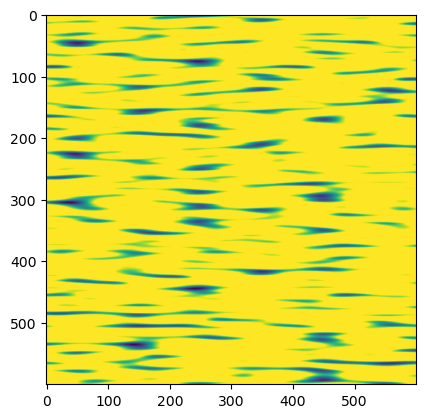

In [95]:
plt.imshow(myNoiseBlue)

In [66]:
frames = []
height = 200
width = 1000

for i in range(myRGBNoise.shape[0]):
    noiseStrip = myRGBNoise[i, ::int(noiseShape/nLEDs), :]
    noiseStrip = noiseStrip[np.newaxis,:,:]
    gifFrame = noiseStrip.repeat(height,0).repeat(int(width//noiseStrip.shape[1]), 1)
    gifFrame = (gifFrame * 255).astype(np.uint8)

    frames.append(gifFrame)

print(int(width//noiseStrip.shape[1]))

imageio.mimsave("./output_water.gif", frames, fps=10)

16


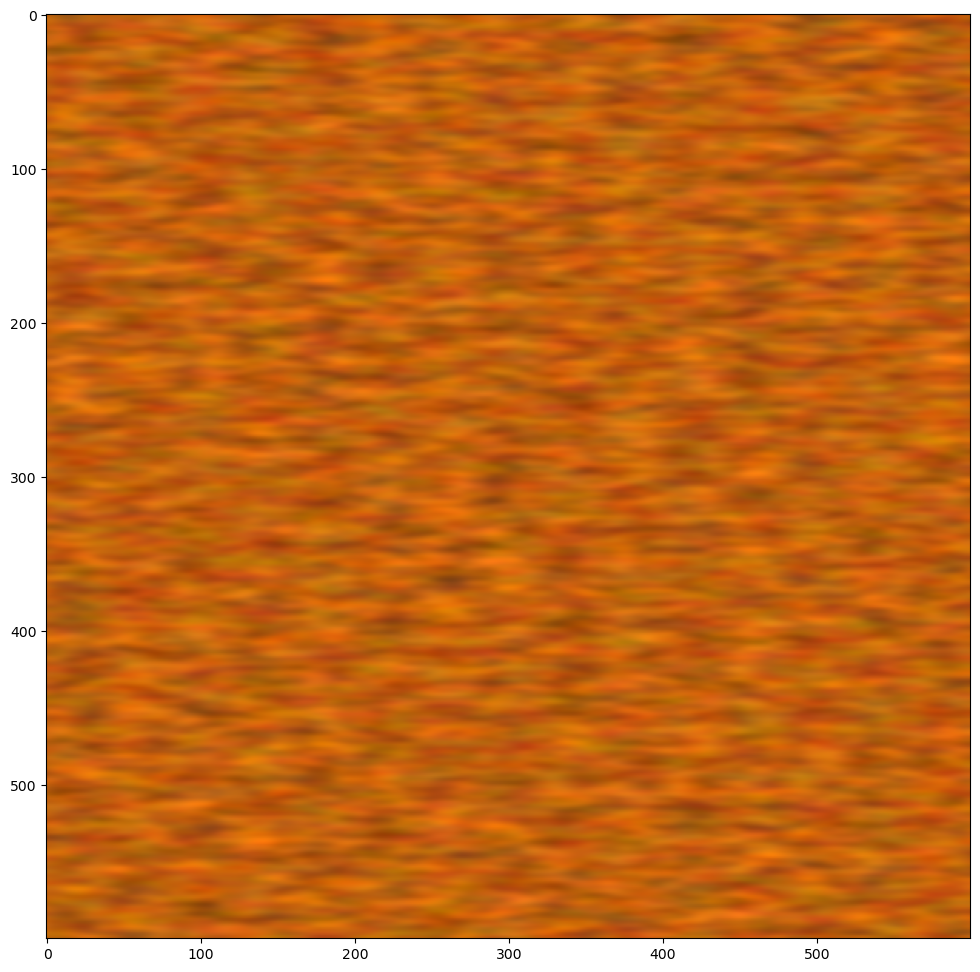

In [67]:
noiseShape = 600
xGridpoints = 60
yGridpoints = 15
nLEDs = 60

myNoiseBlue = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 1.2) / 12
myNoiseRed = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 3) / 4.3
myNoiseYellow = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 3) / 4.3

myRBYNoise = np.dstack((myNoiseRed, myNoiseYellow, myNoiseBlue))

RBYtoRGB = np.array([
    [1, 1, 0],   # R = R+Y
    [0, 1, 0],   # Y = G
    [0, 0, 1]    # B = B
])

myRGBNoise = myRBYNoise @ RBYtoRGB.T
myRGBNoise = myRGBNoise / np.max(myRGBNoise)

plt.figure(figsize=(12,12))
plt.imshow(myRGBNoise)

plt.show()

In [ ]:
frames = []
height = 200
width = 1000

print(myRGBNoise.shape)

for i in range(myRGBNoise.shape[0]):
    noiseStrip = myRGBNoise[i, ::int(noiseShape/nLEDs), :]
    noiseStrip = noiseStrip[np.newaxis,:,:]
    gifFrame = noiseStrip.repeat(height,0).repeat(int(width//noiseStrip.shape[1]), 1)
    gifFrame = (gifFrame * 255).astype(np.uint8)

    frames.append(gifFrame)

print(int(width//noiseStrip.shape[1]))

imageio.mimsave("../output_fire.gif", frames, fps=30)

(600, 600, 3)
16


In [69]:
# c++ pelrin noise output

myArray0 = np.array([127.5,100.933,79.6343,83.4608,107.518,127.5,112.581,104.273,109.468,121.521,
           129.89,105.289,81.9323,79.068,95.9455,112.636,98.7189,88.5205,89.8991,
           99.2277,138.629,127.164,113.976,108.409,112.505,118.777,110.572,97.4013,
           89.4136,92.0292,143.977,151.89,157.035,153.329,143.467,135.979,136.535,
           122.423,105.817,102.23,139.093,160.937,179.817,178.428,159.351,142.24,149.685,137.87,119.311,114.28])

myArray1 = np.array([127.5,144.79,168.257,173.779,154.293,127.5,146.127,140.214,120.142,111.585,142.358,156.797,
           174.859,176.025,155.974,131.297,148.565,145.623,131.428,127.132,136.573,142.174,153.643,160.084,155.122,143.859,152.585,
           151.965,148.63,152.431,119.673,112.75,114.549,127.858,143.731,151.251,147.072,145.744,152.096,
           163.313,113.273,96.4004,86.6296,98.2104,124.195,144.019,130.079,125.618,135.156,149.015])

myArray2 = np.array([127.5,119.333,121.666,130.249,134.104,127.5,132.373,123.131,111.462,112.291,112.224,
           103.891,105.687,114.346,119.302,114.212,117.493,106.233,92.1123,90.499,119.889,110.222,106.962,112.234,119.47,120.576,
           117.723,101.896,83.0934,75.0134,138.697,127.102,116.504,116.692,126.912,136.683,126.69,111.11,
           95.1041,84.597,144.592,131.701,116.217,113.257,125.927,141.932,128.588,120.908,117.758,113.251])

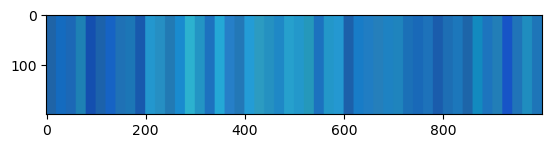

In [70]:
# visualize output
height = 200
width = 1000

cppNoise = np.array([myArray0, myArray1, myArray2])
cppNoise = cppNoise.reshape(cppNoise.shape[-1],3)

cppNoise[:,0] = cppNoise[:,0] / 4  # suppress red
cppNoise[:,1] = cppNoise[:,1]      # leave green alown
cppNoise[:,2] = (cppNoise[:,2] + 255) / 2  # enhance blue


frame = cppNoise[np.newaxis,:,:].repeat(height,0).repeat(int(width//cppNoise.shape[0]), 1)
frame = frame.astype(np.uint8)

plt.imshow(frame)
plt.show()

In [71]:
cppNoise = np.array([myArray0, myArray1, myArray2])
255/np.max(cppNoise)

np.float64(1.418108410217054)

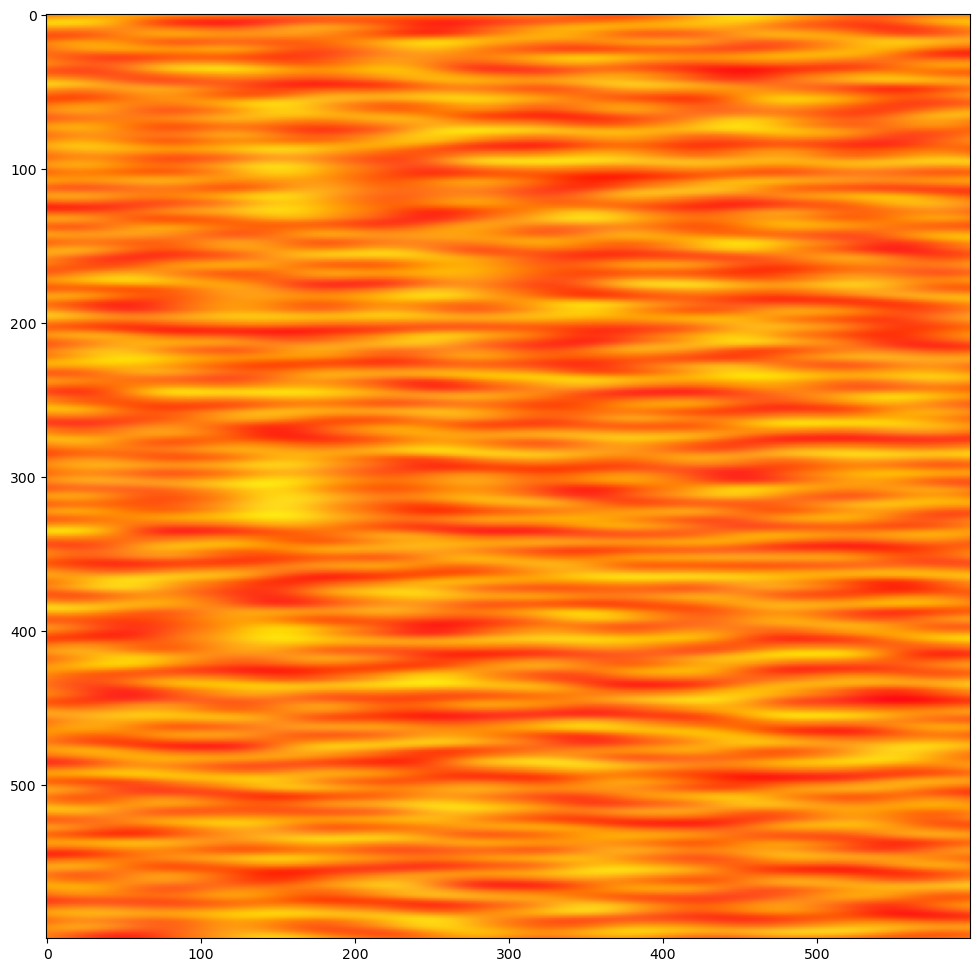

In [89]:
noiseShape = 600
xGridpoints = 60
yGridpoints = 6
nLEDs = 60

myNoiseRed = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) * 100
myNoiseGreen = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 2
myNoiseBlue = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 15

myNoiseRed[myNoiseRed > 1] = 1

myNoiseRed = (myNoiseRed + myNoiseGreen)
myNoiseRed[myNoiseRed > 1] = 1
myNoiseRed[myNoiseRed < 0.5] = 0.5


myRGBNoise = np.dstack((myNoiseRed, myNoiseGreen, myNoiseBlue))

plt.figure(figsize=(12,12))
plt.imshow(myRGBNoise)

plt.show()

In [73]:
frames = []
height = 200
width = 1000

for i in range(myRGBNoise.shape[0]):
    noiseStrip = myRGBNoise[i, ::int(noiseShape/nLEDs), :]
    noiseStrip = noiseStrip[np.newaxis,:,:]
    gifFrame = noiseStrip.repeat(height,0).repeat(int(width//noiseStrip.shape[1]), 1)
    gifFrame = (gifFrame * 255).astype(np.uint8)

    frames.append(gifFrame)

print(int(width//noiseStrip.shape[1]))

imageio.mimsave("../output_ceilingFire.gif", frames, fps = 20)

16


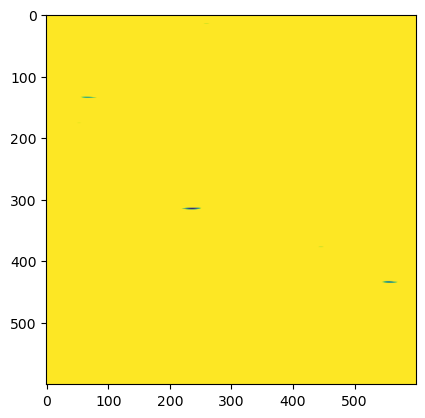

In [85]:
plt.imshow(myNoiseRed)